In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pwd
%cd drive/My Drive/MLSP
%pwd

/content/drive/My Drive/MLSP


'/content/drive/My Drive/MLSP'

In [0]:
import cv2 as cv
import numpy as np
import math
from matplotlib import pyplot as plt

In [4]:
%ls -ltr

total 759
-rw------- 1 root root 137588 Jan 27 06:18 flute.mat
-rw------- 1 root root 257611 Jan 27 06:18 luddy1.jpeg
-rw------- 1 root root  15595 Jan 27 06:18 X.mat
-rw------- 1 root root 182753 Jan 27 06:18 luddy3.jpeg
-rw------- 1 root root 161978 Jan 27 06:18 luddy2.jpeg
-rw------- 1 root root  19989 Feb  3 00:55 MLSP_Assignment1.ipynb


##P2: Central Limit Theorem

###Loading Images

In [0]:
luddy1 = cv.imread('luddy1.jpeg')
luddy2 = cv.imread('luddy2.jpeg')
luddy3 = cv.imread('luddy3.jpeg')

In [6]:
luddy1.shape,luddy2.shape,luddy3.shape

((768, 1024, 3), (768, 1024, 3), (768, 1024, 3))

###Flattening images matrix into a make row vector 

In [7]:
#luddy1=luddy1.reshape(1,2359296)
luddy1=luddy1.flatten((luddy1.shape[0]))
luddy2=luddy2.flatten((luddy2.shape[0]))
luddy3=luddy3.flatten((luddy3.shape[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
luddy1.shape,luddy2.shape,luddy3.shape

((2359296,), (2359296,), (2359296,))

###Plotting histogram to check Gaussian distribution of the 3 images

(array([114291., 423429., 638568., 492476.,  80831.,  39898.,  39124.,
         55316., 208266., 267097.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

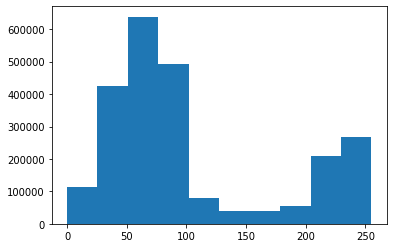

In [9]:
plt.hist(luddy1)

(array([122051., 502716., 574905., 262681.,  85999., 119939., 155232.,
        158480., 173305., 203988.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

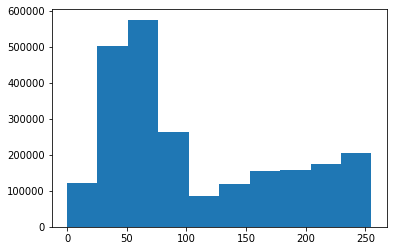

In [10]:
plt.hist(luddy2)

(array([ 76901., 521025., 658593., 303340.,  71499.,  72650.,  85390.,
        108291., 192033., 269574.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

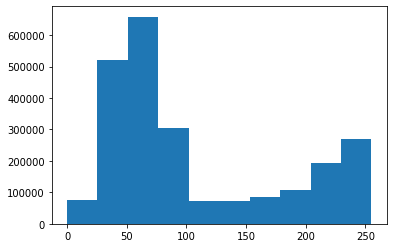

In [11]:
plt.hist(luddy3)

###Calculating mean,variance and normalizing image vector

In [12]:
np.mean(luddy1)

103.35931735568576

In [13]:
math.sqrt(np.var(luddy1))

72.63540952924437

In [14]:
math.sqrt(np.mean(abs(luddy1 - luddy1.mean())**2)) 

72.63540952924437

In [0]:
l1=(luddy1-np.mean(luddy1))/math.sqrt(np.var(luddy1))
l2=(luddy2-np.mean(luddy2))/math.sqrt(np.var(luddy2))
l3=(luddy3-np.mean(luddy3))/math.sqrt(np.var(luddy3))

In [16]:
l1.shape,l2.shape,l3.shape

((2359296,), (2359296,), (2359296,))

### Plotting histogram on the normalized image vectors

(array([114291., 449208., 612789., 502342.,  70965.,  41335.,  37687.,
         55316., 208266., 267097.]),
 array([-1.42298802, -1.07191958, -0.72085113, -0.36978269, -0.01871425,
         0.33235419,  0.68342263,  1.03449107,  1.38555951,  1.73662795,
         2.0876964 ]),
 <a list of 10 Patch objects>)

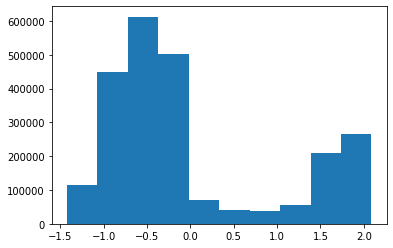

In [17]:
plt.hist(l1)

(array([122051., 502716., 574905., 266187.,  82493., 119939., 155232.,
        158480., 173305., 203988.]),
 array([-1.45632455, -1.10655207, -0.75677959, -0.40700711, -0.05723463,
         0.29253785,  0.64231034,  0.99208282,  1.3418553 ,  1.69162778,
         2.04140026]),
 <a list of 10 Patch objects>)

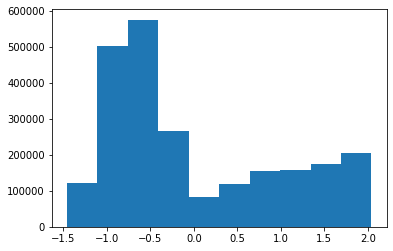

In [18]:
plt.hist(l2)

(array([ 76901., 521025., 658593., 306234.,  68605.,  75652.,  82388.,
        114838., 185486., 269574.]),
 array([-1.42299212, -1.08113027, -0.73926841, -0.39740655, -0.05554469,
         0.28631716,  0.62817902,  0.97004088,  1.31190274,  1.65376459,
         1.99562645]),
 <a list of 10 Patch objects>)

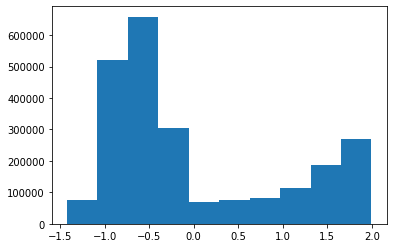

In [19]:
plt.hist(l3)

In [20]:
pow(l1,4)-3

array([ 0.98735193, 15.99631512, 13.16356915, ..., -2.88433492,
       -2.860894  , -2.75003258])

###Calculating Kurtosis for the 3 image vectors

In [0]:
def exp(array,n):
  sum=0
  for i in range(n):
    sum+=array[i]/n
  return sum  

In [22]:
print('Kurtosis value for image1:',exp(pow(l1,4),2359296)-3)

Kurtosis value for image1: -0.5591356613464091


In [23]:
print('Kurtosis value for image1:',exp(pow(l2,4),2359296)-3)

Kurtosis value for image1: -0.9185331246187158


In [24]:
print('Kurtosis value for image1:',exp(pow(l3,4),2359296)-3)

Kurtosis value for image1: -0.8409530035621664


From the above 3 histograms(normalized), we can say that the 2nd image is not a good image as it looks less Gaussian as no good peak. So, it is not the sharpest image. Further looking at the Kurtosis value, tells us that the image 1 is the sharpest among all the other images as it's Kurtosis value is higher than the other 2.  

##P3: Gradient Ascent for Eigendecomposition

###Loading 1,000 randomly generated samples from a 2D Gaussian distribution collected in X.mat

In [0]:
import scipy.io
mat = scipy.io.loadmat('X.mat')

In [26]:
mat

{'X': array([[-0.80270267,  0.14826696, -0.73008652, ..., -0.38844022,
         -0.04152344,  1.95023934],
        [ 1.51626395,  1.03244736, -0.45484151, ...,  1.26987396,
          0.45179885, -0.77529334]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Jan 21 08:41:08 2017',
 '__version__': '1.0'}

In [27]:
mat_f=mat['X']
mat_f.shape

(2, 1000)

### Scatter plot of input matrix

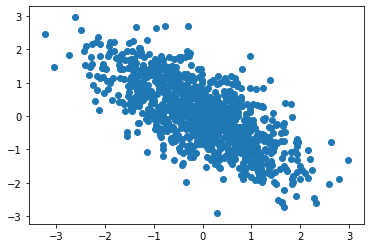

In [28]:
plt.scatter(mat_f[0,:],mat_f[1,:])

###Calculating eigen vectors w1,w2

In [29]:
w1=np.random.standard_normal((2,1))
print(w1)

[[ 1.08911549]
 [-0.33906915]]


In [30]:
w1.shape

(2, 1)

### L2-normalize w1 and checking if it sums upto 1

In [0]:
denom=math.sqrt(pow(w1[0],2)+pow(w1[1],2))

In [0]:
w1=w1/denom

In [33]:
w1[0],w1[1]

(array([0.95479876]), array([-0.29725296]))

In [34]:
print(pow(w1[0],2)+pow(w1[1],2))

[1.]


###Update step(gradient)

In [0]:
delta_w=2*np.matmul(np.matmul(mat_f,mat_f.T),w1)

In [36]:
delta_w

array([[ 2263.24836622],
       [-1887.03407902]])

In [37]:
learning_rate=0.002
w1=w1+learning_rate*delta_w #gradient ascent
w1

array([[ 5.48129549],
       [-4.07132112]])

In [38]:
denom=math.sqrt(pow(w1[0],2)+pow(w1[1],2))
w1=w1/denom
w1[0],w1[1]

(array([0.80277879]), array([-0.59627696]))

In [39]:
print(pow(w1[0],2)+pow(w1[1],2))

[1.]


###Updating until absolute values of gradient updates are too small

In [40]:
for i in range(50):
  delta_w=2*np.matmul(np.matmul(mat_f,mat_f.T),w1)
  print('Epoch:',i,'delta_w:',delta_w)
  w1=w1+learning_rate*delta_w
  denom=math.sqrt(pow(w1[0],2)+pow(w1[1],2))
  w1=w1/denom

Epoch: 0 delta_w: [[ 2376.77550492]
 [-2263.19164461]]
Epoch: 1 delta_w: [[ 2356.98752553]
 [-2330.07412614]]
Epoch: 2 delta_w: [[ 2346.45906007]
 [-2344.41104922]]
Epoch: 3 delta_w: [[ 2343.08427538]
 [-2348.08317311]]
Epoch: 4 delta_w: [[ 2342.09734951]
 [-2349.09156545]]
Epoch: 5 delta_w: [[ 2341.81540163]
 [-2349.37456241]]
Epoch: 6 delta_w: [[ 2341.73537036]
 [-2349.45448756]]
Epoch: 7 delta_w: [[ 2341.71269438]
 [-2349.47710117]]
Epoch: 8 delta_w: [[ 2341.70627267]
 [-2349.48350263]]
Epoch: 9 delta_w: [[ 2341.70445434]
 [-2349.48531502]]
Epoch: 10 delta_w: [[ 2341.7039395 ]
 [-2349.48582816]]
Epoch: 11 delta_w: [[ 2341.70379372]
 [-2349.48597346]]
Epoch: 12 delta_w: [[ 2341.70375245]
 [-2349.48601459]]
Epoch: 13 delta_w: [[ 2341.70374077]
 [-2349.48602624]]
Epoch: 14 delta_w: [[ 2341.70373746]
 [-2349.48602954]]
Epoch: 15 delta_w: [[ 2341.70373652]
 [-2349.48603047]]
Epoch: 16 delta_w: [[ 2341.70373625]
 [-2349.48603074]]
Epoch: 17 delta_w: [[ 2341.70373618]
 [-2349.48603081]]
Ep

In [41]:
w1

array([[ 0.70593278],
       [-0.70827884]])

### Calculating maximum eigen-value

In [0]:
v=w1
A=mat_f

In [43]:
v.shape,A.shape

((2, 1), (2, 1000))

In [44]:
sd=np.matmul(v.T,A)
sd=np.matmul(sd,sd.T)
print('Maximum Eigen Value for 1st eigen vector:',sd[0][0])

Maximum Eigen Value for 1st eigen vector: 1658.5883302531922


In [0]:
ud=np.matmul(A.T,(v/sd))

In [0]:
A_without_first=(A-np.matmul(v,(np.matmul(sd,ud.T))))

###Scatter plot of eigen vector to see direction of the 1st eigen vector

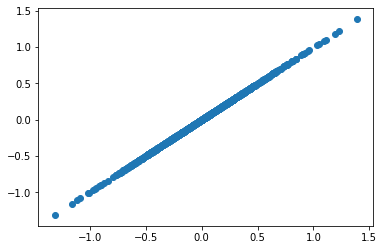

In [47]:
plt.scatter(A_without_first[0,:],A_without_first[1,:])

### Following the above steps to find the 2nd eigen vector and maximum eigen value of that

In [0]:
w2=np.random.standard_normal((2,1))
denom=math.sqrt(pow(w2[0],2)+pow(w2[1],2))
w2=w2/denom
learning_rate=0.002

In [49]:
for i in range(50):
  delta_w2=2*np.matmul(np.matmul(A_without_first,A_without_first.T),w2)
  print('Epoch:',i,'delta_w2:',delta_w2)
  w2=w2+learning_rate*delta_w2
  denom2=math.sqrt(pow(w2[0],2)+pow(w2[1],2))
  w2=w2/denom2

Epoch: 0 delta_w2: [[346.1394586]
 [344.9929273]]
Epoch: 1 delta_w2: [[394.32627038]
 [393.02012802]]
Epoch: 2 delta_w2: [[407.52738365]
 [406.17751472]]
Epoch: 3 delta_w2: [[410.52903251]
 [409.1692211 ]]
Epoch: 4 delta_w2: [[411.18011614]
 [409.81814812]]
Epoch: 5 delta_w2: [[411.31986612]
 [409.9574352 ]]
Epoch: 6 delta_w2: [[411.3497944 ]
 [409.98726435]]
Epoch: 7 delta_w2: [[411.35620059]
 [409.99364932]]
Epoch: 8 delta_w2: [[411.35757171]
 [409.9950159 ]]
Epoch: 9 delta_w2: [[411.35786516]
 [409.99530838]]
Epoch: 10 delta_w2: [[411.35792797]
 [409.99537098]]
Epoch: 11 delta_w2: [[411.35794141]
 [409.99538437]]
Epoch: 12 delta_w2: [[411.35794429]
 [409.99538724]]
Epoch: 13 delta_w2: [[411.3579449 ]
 [409.99538785]]
Epoch: 14 delta_w2: [[411.35794503]
 [409.99538799]]
Epoch: 15 delta_w2: [[411.35794506]
 [409.99538801]]
Epoch: 16 delta_w2: [[411.35794507]
 [409.99538802]]
Epoch: 17 delta_w2: [[411.35794507]
 [409.99538802]]
Epoch: 18 delta_w2: [[411.35794507]
 [409.99538802]]
Epoch

In [50]:
v2=w2
A2=A_without_first
sd2=np.matmul(v2.T,A2)
sd2=np.matmul(sd2,sd2.T)
ud2=np.matmul(A2.T,(v2/sd2))
print(v2)

[[0.70827884]
 [0.70593278]]


In [51]:
print('Maximum eigen value of 2nd eigen vector:',sd2[0][0])

Maximum eigen value of 2nd eigen vector: 290.39265536970817


###Scatter plot of eigen vector to see direction of the 2nd eigen vector

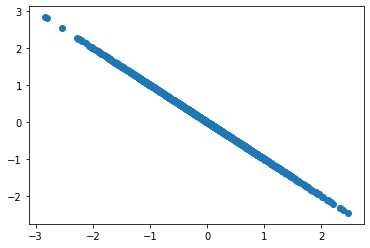

In [52]:
A_without_second=A-np.matmul(v2,(np.matmul(sd2,ud2.T)))
plt.scatter(A_without_second[0,:],A_without_second[1,:])

###Adding direction to initial scatter plot of the data

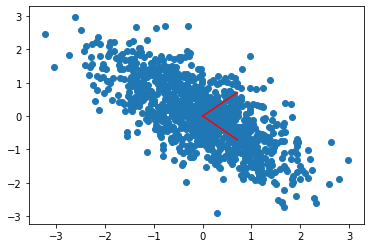

In [53]:
plt.scatter(mat_f[0,:],mat_f[1,:])
#plt.plot(A_without_first[0,:],A_without_first[1,:],'.y-')
#plt.plot(A_without_second[0,:],A_without_second[1,:],'.r-')
plt.plot((0,w1[0]),(0,w1[1]),'r')
plt.plot((0,w2[0]),(0,w2[1]),'r')

##P4: Eigenvectors for Two-Notes

###Loading Flute.mat and defining colormap

In [0]:
mat = scipy.io.loadmat('flute.mat')
mat_f=mat['X']

In [0]:
from collections import OrderedDict
cmaps = OrderedDict()
cmaps['Perceptually Uniform Sequential'] = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

###Checking different colormaps to see which one is good to visualize the data

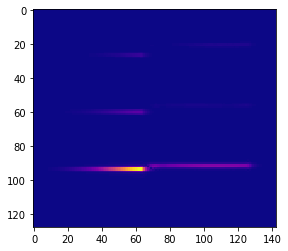

In [56]:
plt.imshow(mat_f,cmap='plasma')

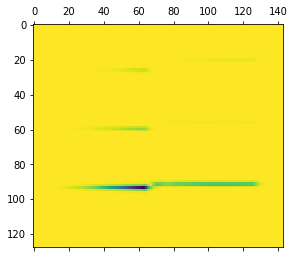

In [57]:
plt.matshow(mat_f,cmap='viridis_r')

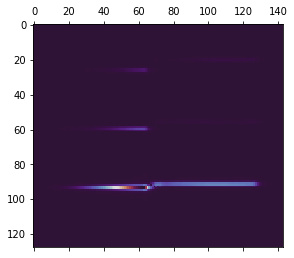

In [58]:
plt.matshow(mat_f,cmap='twilight_shifted')

In [59]:
mat_f.shape

(128, 143)

In [60]:
w1.shape

(2, 1)

###Calculating eigen vectors v1,v2 and plotting them to check their representative spectra

In [0]:
w1=np.random.standard_normal((128,1))
summ=0
for i in range(128):
  summ+=(pow(w1[i],2))
denom=math.sqrt(summ)  
w1=w1/denom
learning_rate=0.002
for i in range(50):
  delta_w1=2*np.matmul(np.matmul(mat_f,mat_f.T),w1)
  #print('Epoch:',i,'delta_w1:',delta_w1)
  w1=w1+learning_rate*delta_w1
  summ1=sum(pow(w1,2))
  denom1=math.sqrt(summ1)
  w1=w1/denom1
v1=w1
A=mat_f
sd1=np.matmul(v1.T,A)
sd1=np.matmul(sd1,sd1.T)
ud1=np.matmul(A.T,(v1/sd1))
#print(v1)  
#print(sd1)
A_without_first=A-np.matmul(v1,(np.matmul(sd1,ud1.T)))

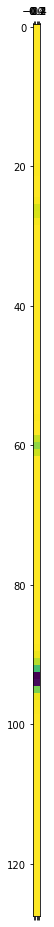

In [62]:
plt.matshow(v1,cmap='viridis_r')

In [0]:
w2=np.random.standard_normal((128,1))
summ=0
for i in range(128):
  summ+=sum(pow(w2[i],2))
denom=math.sqrt(summ)  
w2=w2/denom
learning_rate=0.002
for i in range(50):
  delta_w2=2*np.matmul(np.matmul(A_without_first,A_without_first.T),w2)
  #print('Epoch:',i,'delta_w1:',delta_w1)
  w2=w2+learning_rate*delta_w2
  summ2=sum(pow(w2,2))
  denom2=math.sqrt(summ2)
  w2=w2/denom2
v2=w2
A=A_without_first
sd2=np.matmul(v2.T,A)
sd2=np.matmul(sd2,sd2.T)
ud2=np.matmul(A.T,(v2/sd2))
#print(v1)  
#print(sd1)
A_without_second=A-np.matmul(v2,(np.matmul(sd2,ud2.T)))

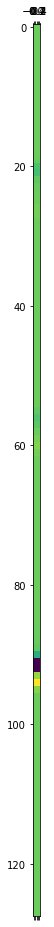

In [64]:
plt.matshow(v2,cmap='viridis_r')

###The maximum eigen values for the 2 eigen vectors 

In [65]:
print(sd1,sd2)
print('Maximum eigen value of 1st eigen vector:',sd1[0][0])
print('Maximum eigen value of 2nd eigen vector:',sd2[0][0])

[[188655.48030139]] [[43797.07037081]]
Maximum eigen value of 1st eigen vector: 188655.48030138988
Maximum eigen value of 2nd eigen vector: 43797.07037080818


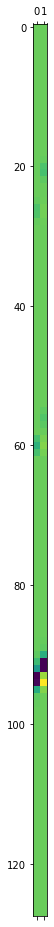

In [66]:
v=np.hstack((v1,v2))
plt.matshow(v,cmap='viridis_r')

###Calculating activation matrix and visualize it

In [0]:
activation_matrix=np.dot(v.T,mat_f)

In [68]:
v.shape,mat_f.shape,activation_matrix.shape

((128, 2), (128, 143), (2, 143))

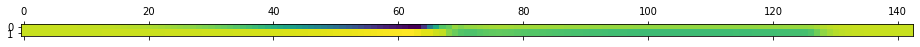

In [69]:
plt.matshow(activation_matrix,cmap='viridis_r')

###Reshaping the activation matrix and calculating the recovered source and plotting them for eigen vectors 1 and 2 separately  

In [70]:
activation_matrix11=(activation_matrix[0].shape[0],1)
activation_matrix22=(activation_matrix[1].shape[0],1)
activation_matrix11,activation_matrix22

((143, 1), (143, 1))

In [0]:
activation_matrix1=activation_matrix[0].reshape(activation_matrix11)
activation_matrix2=activation_matrix[1].reshape(activation_matrix22)

In [72]:
activation_matrix.shape,activation_matrix[0].shape,activation_matrix[1].shape

((2, 143), (143,), (143,))

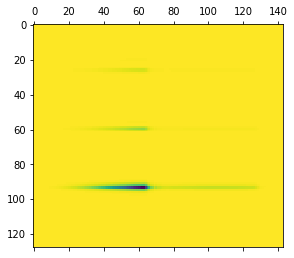

In [73]:
activation_matrix_first=np.dot(v1,activation_matrix1.T)
plt.matshow(activation_matrix_first,cmap='viridis_r')

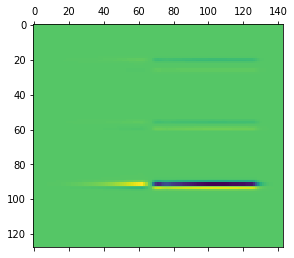

In [74]:
activation_matrix_second=np.dot(v2,activation_matrix2.T)
plt.matshow(activation_matrix_second,cmap='viridis_r')